In [6]:
!pip install optbinning --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [7]:
from optbinning import BinningProcess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
train = pd.read_csv('E:/ml_Dzyuin/Практика_7/TrainSample.csv')
train

Клиент  F (Частота)  M (Сумма)   R (Давность)  \
0      client42185           76      57813            400   
1      client40742           23       2694             61   
2      client15108           69      56747             51   
3      client11153           45      24396             63   
4      client13931            8       1957            315   
...            ...          ...        ...            ...   
39901  client31345            2      13324              0   
39902  client27516            1         55              0   
39903   client5388            1         99              0   
39904  client13382            1       7150              0   
39905  client33700            1        399              0   

       Промежуток между первым и последним визитом  \
0                                              329   
1                                              668   
2                                              678   
3                                              666   
4                                              414   
...                                            ...   
39901                                            0   
39902                                            0   
39903                                            0   
39904                                            0   
39905                                            0   

       Количество уникальных товаров  Количество уникальных товарных групп  \
0                                 67                                     9   
1                                 21                                     6   
2                                 61                                    12   
3                                 43                                    10   
4                                  8                                     3   
...                              ...                                   ...   
39901                              2                                     2   
39902                              1                                     1   
39903                              1                                     1   
39904                              1                                     1   
39905                              1                                     1   

       Сумма за последний визит  Визитов в выходные  \
0                           199                 3.0   
1                            80                 NaN   
2                          1457                 7.0   
3                          4144                 3.0   
4                           368                 1.0   
...                         ...                 ...   
39901                     13324                 1.0   
39902                        55                 1.0   
39903                        99                 1.0   
39904                      7150                 1.0   
39905                       399                 1.0   

              Востребованная группа  Доля визитов в выходные  \
0                   Кафель и плитка                     21.0   
1          Товары для дачи и отдыха                      NaN   
2                 Столярные изделия                     35.0   
3          Товары для дачи и отдыха                     25.0   
4                     Лаки и краски                     50.0   
...                             ...                      ...   
39901                 Стойматериалы                    100.0   
39902                 Стойматериалы                    100.0   
39903  Оборудование для сада и дачи                    100.0   
39904                 Стойматериалы                    100.0   
39905      Товары для дачи и отдыха                    100.0   

       Доля трат в последнем визите  Событие  
0                                 0    False  
1                                 3    False  
2                                 3     True  
3                                17    False  
4                           

In [9]:
test = pd.read_csv('E:/ml_Dzyuin/Практика_7/TestSample.csv')
test

Клиент  F (Частота)  M (Сумма)   R (Давность)  \
0      client42185           76      57813            430   
1      client40742           23       2694             91   
2      client15108           69      56747             81   
3      client11153           45      24396             93   
4      client13931            8       1957            345   
...            ...          ...        ...            ...   
41191   client1491            1       4190              0   
41192   client9356            1       1999              0   
41193   client7962            2       3048              0   
41194  client34909            1       2600              0   
41195   client8265            1        499              0   

       Промежуток между первым и последним визитом  \
0                                              329   
1                                              668   
2                                              678   
3                                              666   
4                                              414   
...                                            ...   
41191                                            0   
41192                                            0   
41193                                            0   
41194                                            0   
41195                                            0   

       Количество уникальных товаров  Количество уникальных товарных групп  \
0                                 67                                     9   
1                                 21                                     6   
2                                 61                                    12   
3                                 43                                    10   
4                                  8                                     3   
...                              ...                                   ...   
41191                              1                                     1   
41192                              1                                     1   
41193                              2                                     1   
41194                              1                                     1   
41195                              1                                     1   

       Сумма за последний визит  Визитов в выходные  \
0                           199                 3.0   
1                            80                 NaN   
2                          1457                 7.0   
3                          4144                 3.0   
4                           368                 1.0   
...                         ...                 ...   
41191                      4190                 NaN   
41192                      1999                 NaN   
41193                      3048                 NaN   
41194                      2600                 NaN   
41195                       499                 NaN   

            Востребованная группа  Доля визитов в выходные  \
0                 Кафель и плитка                     21.0   
1        Товары для дачи и отдыха                      NaN   
2               Столярные изделия                     35.0   
3        Товары для дачи и отдыха                     25.0   
4                   Лаки и краски                     50.0   
...                           ...                      ...   
41191                Окна и двери                      NaN   
41192              Ванная комната                      NaN   
41193                 Инструменты                      NaN   
41194  Древесно-плитные материалы                      NaN   
41195               Стойматериалы                      NaN   

       Доля трат в последнем визите  Событие  
0                                 0    False  
1                                 3    False  
2                                 3     True  
3                                17    False  
4                                19    False  
...  

In [10]:
variable_names = list(train.loc[:, ~train.columns.isin(['Клиент','Событие'])])
variable_names

['F (Частота)',
 'M (Сумма)',
 ' R (Давность)',
 'Промежуток между первым и последним визитом',
 'Количество уникальных товаров',
 'Количество уникальных товарных групп',
 'Сумма за последний визит',
 'Визитов в выходные',
 'Востребованная группа',
 'Доля визитов в выходные',
 'Доля трат в последнем визите']

In [11]:
X_train = train[variable_names]

In [12]:
Y_train = train["Событие"]

In [13]:
X_test = test[variable_names]

In [14]:
Y_test = test['Событие']

In [15]:
selection_criteria = {

    "iv":
        {
            "min": 0.02
        }
}

In [16]:
from optbinning.binning import binning_process
binning_process = BinningProcess(variable_names,selection_criteria = selection_criteria,max_n_bins=6)
binning_process.fit(X_train,Y_train)

: 

In [ ]:
binning_process.information(print_level=2)

optbinning (Version 0.19.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    max_n_prebins                         20   * d
    min_prebin_size                     0.05   * d
    min_n_bins                            no   * d
    max_n_bins                             6   * U
    min_bin_size                          no   * d
    max_bin_size                          no   * d
    max_pvalue                            no   * d
    max_pvalue_policy            consecutive   * d
    selection_criteria                   yes   * U
    fixed_variables                       no   * d
    categorical_variables                 no   * d
    special_codes                         no   * d
    split_digits                          no   * d
    binning_fit_params                    no   * d
    binning_transform_params              no   * d
    verbose                            False   * d
  End options

  Statistics
    Number of records                  399

In [ ]:
binning_process.summary()

name        dtype   status  \
0                                   F (Частота)    numerical  OPTIMAL   
1                                     M (Сумма)    numerical  OPTIMAL   
2                                  R (Давность)    numerical  OPTIMAL   
3   Промежуток между первым и последним визитом    numerical  OPTIMAL   
4                 Количество уникальных товаров    numerical  OPTIMAL   
5          Количество уникальных товарных групп    numerical  OPTIMAL   
6                      Сумма за последний визит    numerical  OPTIMAL   
7                            Визитов в выходные    numerical  OPTIMAL   
8                         Востребованная группа  categorical  OPTIMAL   
9                       Доля визитов в выходные    numerical  OPTIMAL   
10                 Доля трат в последнем визите    numerical  OPTIMAL   

    selected n_bins        iv        js      gini quality_score  
0       True      6  0.636572   0.07513   0.42587      0.643413  
1       True      6  0.431581  0.051658  0.354982      0.913487  
2       True      6  0.913079  0.104532  0.495019      0.246378  
3       True      6  0.502945  0.060147   0.36513      0.785521  
4       True      6  0.608744  0.072308  0.419621      0.704359  
5       True      6  0.585591  0.069999  0.414469      0.755047  
6       True      6  0.056953  0.007097  0.132499      0.195523  
7       True      5  0.594756  0.070003  0.399575      0.707692  
8       True      6  0.067872  0.008416  0.140406      0.251777  
9       True      5   0.52248  0.063098  0.388866      0.835266  
10      True      6   0.51071  0.061149  0.377946      0.836583

In [ ]:
optb = binning_process.get_binned_variable('Сумма за последний визит')

In [ ]:
optb.binning_table.build()

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0           (-inf, 167.50)   4488   0.112464       3542    946    0.210784   
1         [167.50, 658.50)  10744   0.269233       8259   2485    0.231292   
2         [658.50, 942.50)   3258   0.081642       2608    650    0.199509   
3        [942.50, 1906.50)   7999   0.200446       6688   1311    0.163895   
4       [1906.50, 5078.00)   8230   0.206235       6996   1234    0.149939   
5           [5078.00, inf)   5187   0.129980       4466    721    0.139001   
6                  Special      0   0.000000          0      0    0.000000   
7                  Missing      0   0.000000          0      0    0.000000   
Totals                      39906   1.000000      32559   7347    0.184108   

             WoE        IV        JS  
0      -0.168558  0.003367  0.000420  
1      -0.287731  0.024334  0.003031  
2      -0.099395  0.000832  0.000104  
3       0.140763  0.003797  0.000474  
4       0.246316  0.011555  0.001441  
5       0.334848  0.013069  0.001626  
6            0.0  0.000000  0.000000  
7            0.0  0.000000  0.000000  
Totals            0.056953  0.007097

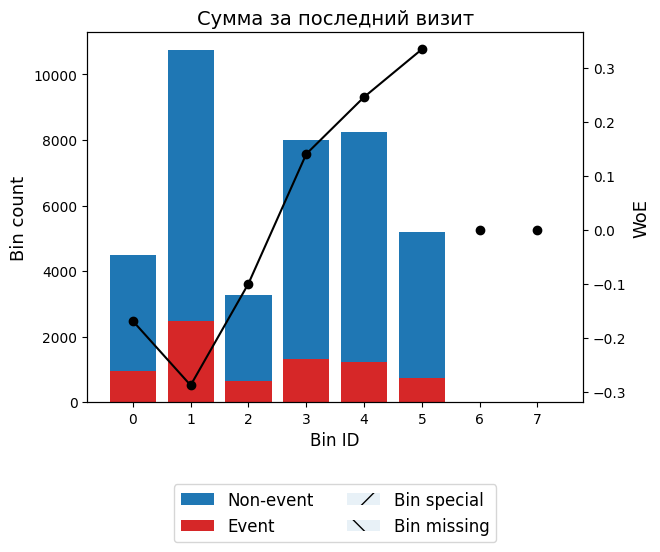

In [ ]:
optb.binning_table.plot(metric="woe")

In [ ]:
optb.binning_table.analysis()

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.13249885
    IV (Jeffrey)             0.05695337
    JS (Jensen-Shannon)      0.00709656
    Hellinger                0.00710784
    Triangular               0.02829657
    KS                       0.11291437
    HHI                      0.19140612
    HHI (normalized)         0.07589271
    Cramer's V               0.09252424
    Quality score            0.19552315

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]  P[B > A]
        0      1     7.628948 0.005744  0.002625  0.997375
        1      2    14.532798 0.000138  0.999996  0.000004
        2      3    20.410938 0.000006  0.999997  0.000003
        3      4     5.975350 0.014507  0.993122  0.006878
        4      5     3.057961 0.080342  0.960785  0.039215



In [ ]:
X_train_transform = binning_process.transform(X_train, metric="woe")
X_train_transform

F (Частота)  M (Сумма)   R (Давность)  \
0        -1.593880  -1.382229       1.886370   
1        -0.124067   0.530198      -0.328925   
2        -0.922595  -1.382229      -0.328925   
3        -0.922595  -0.761234      -0.328925   
4         0.389100   0.967065       0.663046   
...            ...        ...            ...   
39901     1.016494  -0.292758      -1.189332   
39902     1.016494   0.967065      -1.189332   
39903     1.016494   0.967065      -1.189332   
39904     1.016494   0.135935      -1.189332   
39905     1.016494   0.967065      -1.189332   

       Промежуток между первым и последним визитом  \
0                                        -0.391250   
1                                        -1.049649   
2                                        -1.049649   
3                                        -1.049649   
4                                        -0.391250   
...                                            ...   
39901                                     1.189184   
39902                                     1.189184   
39903                                     1.189184   
39904                                     1.189184   
39905                                     1.189184   

       Количество уникальных товаров  Количество уникальных товарных групп  \
0                          -1.421713                             -0.641889   
1                          -0.127925                             -0.095522   
2                          -1.421713                             -1.297094   
3                          -0.608859                             -1.297094   
4                           0.473950                              0.763142   
...                              ...                                   ...   
39901                       1.000895                              0.763142   
39902                       1.000895                              1.106736   
39903                       1.000895                              1.106736   
39904                       1.000895                              1.106736   
39905                       1.000895                              1.106736   

       Сумма за последний визит  Визитов в выходные  Востребованная группа  \
0                     -0.287731           -0.548717              -0.097796   
1                     -0.168558            0.000000               0.450196   
2                      0.140763           -1.735066              -0.097796   
3                      0.246316           -0.548717               0.450196   
4                     -0.287731            0.460716              -0.012771   
...                         ...                 ...                    ...   
39901                  0.334848            0.460716              -0.503528   
39902                 -0.168558            0.460716              -0.503528   
39903                 -0.168558            0.460716              -0.012771   
39904                  0.334848            0.460716              -0.503528   
39905                 -0.287731            0.460716               0.450196   

       Доля визитов в выходные  Доля трат в последнем визите  
0                    -0.702799                     -0.899803  
1                     0.000000                     -0.593214  
2                    -0.568272                     -0.593214  
3                    -0.702799                     -0.257126  
4                     0.079608                     -0.257126  
...                        ...                           ...  
39901                 1.151814                      1.186749  
39902                 1.151814                      1.186749  
39903                 1.151814                      1.186749  
39904                 1.151814                      1.186749  
39905                 1.151814                      1.186749  

[39906 rows x 11 columns]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
binning_process.fit(X_test,Y_test)

BinningProcess(max_n_bins=6, selection_criteria={'iv': {'min': 0.02}},
               variable_names=['F (Частота)', 'M (Сумма)', ' R (Давность)',
                               'Промежуток между первым и последним визитом',
                               'Количество уникальных товаров',
                               'Количество уникальных товарных групп',
                               'Сумма за последний визит', 'Визитов в выходные',
                               'Востребованная группа',
                               'Доля визитов в выходные',
                               'Доля трат в последнем визите'])

In [ ]:
binning_process.information(print_level=2)

optbinning (Version 0.19.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    max_n_prebins                         20   * d
    min_prebin_size                     0.05   * d
    min_n_bins                            no   * d
    max_n_bins                             6   * U
    min_bin_size                          no   * d
    max_bin_size                          no   * d
    max_pvalue                            no   * d
    max_pvalue_policy            consecutive   * d
    selection_criteria                   yes   * U
    fixed_variables                       no   * d
    categorical_variables                 no   * d
    special_codes                         no   * d
    split_digits                          no   * d
    binning_fit_params                    no   * d
    binning_transform_params              no   * d
    verbose                            False   * d
  End options

  Statistics
    Number of records                  411

In [ ]:
binning_process.summary()

name        dtype   status  \
0                                   F (Частота)    numerical  OPTIMAL   
1                                     M (Сумма)    numerical  OPTIMAL   
2                                  R (Давность)    numerical  OPTIMAL   
3   Промежуток между первым и последним визитом    numerical  OPTIMAL   
4                 Количество уникальных товаров    numerical  OPTIMAL   
5          Количество уникальных товарных групп    numerical  OPTIMAL   
6                      Сумма за последний визит    numerical  OPTIMAL   
7                            Визитов в выходные    numerical  OPTIMAL   
8                         Востребованная группа  categorical  OPTIMAL   
9                       Доля визитов в выходные    numerical  OPTIMAL   
10                 Доля трат в последнем визите    numerical  OPTIMAL   

    selected n_bins        iv        js      gini quality_score  
0       True      6  0.674272  0.079308  0.438266      0.590357  
1       True      6  0.465815  0.055717  0.368739      0.880802  
2       True      6  1.195691  0.133263  0.559266      0.048541  
3       True      6  0.532519  0.063127  0.372502       0.77489  
4       True      6  0.653319  0.076856  0.431051      0.620515  
5       True      6  0.616426  0.073325  0.424119      0.687664  
6       True      6  0.056014  0.006979  0.130278      0.192433  
7       True      5  0.628173  0.073659  0.410252      0.659844  
8       True      6  0.075285   0.00933  0.148433       0.23407  
9       True      5  0.539294  0.064992  0.393594      0.816579  
10      True      6  0.559447  0.066424  0.390741      0.779728

In [ ]:
optb = binning_process.get_binned_variable('Сумма за последний визит')

In [ ]:
optb.binning_table.build()

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0           (-inf, 313.50)   9294   0.225604       7192   2102    0.226167   
1         [313.50, 404.50)   2249   0.054593       1676    573    0.254780   
2         [404.50, 941.50)   7768   0.188562       6094   1674    0.215499   
3        [941.50, 1435.50)   5139   0.124745       4237    902    0.175521   
4       [1435.50, 5084.50)  11470   0.278425       9705   1765    0.153880   
5           [5084.50, inf)   5276   0.128071       4518    758    0.143669   
6                  Special      0   0.000000          0      0    0.000000   
7                  Missing      0   0.000000          0      0    0.000000   
Totals                      41196   1.000000      33422   7774    0.188708   

             WoE        IV        JS  
0       -0.22835  0.012605  0.001572  
1       -0.38515  0.009074  0.001127  
2      -0.166341  0.005489  0.000685  
3       0.088567  0.000952  0.000119  
4       0.246061  0.015585  0.001943  
5       0.326712  0.012309  0.001532  
6            0.0  0.000000  0.000000  
7            0.0  0.000000  0.000000  
Totals            0.056014  0.006979

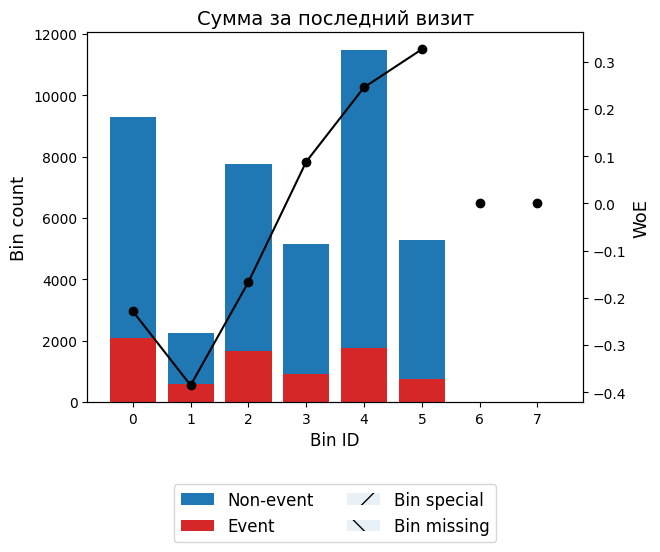

In [ ]:
optb.binning_table.plot(metric="woe")

In [ ]:
optb.binning_table.analysis()

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.13027829
    IV (Jeffrey)             0.05601442
    JS (Jensen-Shannon)      0.00697889
    Hellinger                0.00699032
    Triangular               0.02782483
    KS                       0.11175967
    HHI                      0.19891732
    HHI (normalized)         0.08447694
    Cramer's V               0.09248301
    Quality score            0.19243346

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1     8.326691 3.906676e-03  0.001413 9.985875e-01
        1      2    15.465517 8.402427e-05  0.999954 4.566176e-05
        2      3    30.944810 2.654711e-08  1.000000 4.350498e-11
        3      4    12.330645 4.455825e-04  0.999784 2.164797e-04
        4      5     2.944033 8.619527e-02  0.95

In [ ]:
X_test_transform = binning_process.transform(X_test, metric="woe")
X_test_transform

F (Частота)  M (Сумма)   R (Давность)  \
0        -1.608765  -1.306504       2.153916   
1        -0.040188   0.459357       0.162120   
2        -0.920812  -1.306504       0.162120   
3        -0.920812  -0.445115       0.162120   
4         0.417846   1.017373       0.906717   
...            ...        ...            ...   
41191     1.084740   0.459357      -1.617646   
41192     1.084740   1.017373      -1.617646   
41193     1.084740   0.459357      -1.617646   
41194     1.084740   0.459357      -1.617646   
41195     1.084740   1.017373      -1.617646   

       Промежуток между первым и последним визитом  \
0                                        -0.368147   
1                                        -1.104690   
2                                        -1.104690   
3                                        -1.104690   
4                                        -0.368147   
...                                            ...   
41191                                     1.303954   
41192                                     1.303954   
41193                                     1.303954   
41194                                     1.303954   
41195                                     1.303954   

       Количество уникальных товаров  Количество уникальных товарных групп  \
0                          -1.012708                             -0.927709   
1                          -0.081210                             -0.091594   
2                          -1.012708                             -1.446106   
3                          -0.589241                             -0.927709   
4                           0.408273                              0.473251   
...                              ...                                   ...   
41191                       1.069221                              1.046015   
41192                       1.069221                              1.046015   
41193                       1.069221                              1.046015   
41194                       1.069221                              1.046015   
41195                       1.069221                              1.046015   

       Сумма за последний визит  Визитов в выходные  Востребованная группа  \
0                     -0.228350           -0.529253              -0.107590   
1                     -0.228350            0.000000               0.496805   
2                      0.246061           -1.770140              -0.107590   
3                      0.246061           -0.529253               0.496805   
4                     -0.385150            0.487198              -0.107590   
...                         ...                 ...                    ...   
41191                  0.246061            0.000000              -0.512458   
41192                  0.246061            0.000000               0.068156   
41193                  0.246061            0.000000              -0.107590   
41194                  0.246061            0.000000               0.068156   
41195                 -0.166341            0.000000              -0.512458   

       Доля визитов в выходные  Доля трат в последнем визите  
0                    -0.689444                     -0.867050  
1                     0.000000                     -0.483846  
2                    -0.568563                     -0.483846  
3                    -0.689444                     -0.170558  
4                     0.060588                     -0.170558  
...                        ...                           ...  
41191                 0.000000                      1.319079  
41192                 0.000000                      1.319079  
41193                 0.000000                      1.319079  
41194                 0.000000                      1.319079  
41195                 0.000000                      1.319079  

[41196 rows x 11 columns]

In [ ]:
logr = LogisticRegression().fit(X_train_transform, Y_train)
logr.coef_
logr_pred = logr.predict(X_test_transform)

In [ ]:
logr_proba = logr.predict_proba(X_test_transform)
logr_proba

array([[0.89991362, 0.10008638],
       [0.86888727, 0.13111273],
       [0.65968115, 0.34031885],
       ...,
       [0.69966065, 0.30033935],
       [0.71311505, 0.28688495],
       [0.65686066, 0.34313934]])

In [ ]:
LOGR = roc_auc_score(Y_test, logr_proba[:,1])
LOGR

0.8070221909232632

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, logr_proba[:,1], drop_intermediate=False)

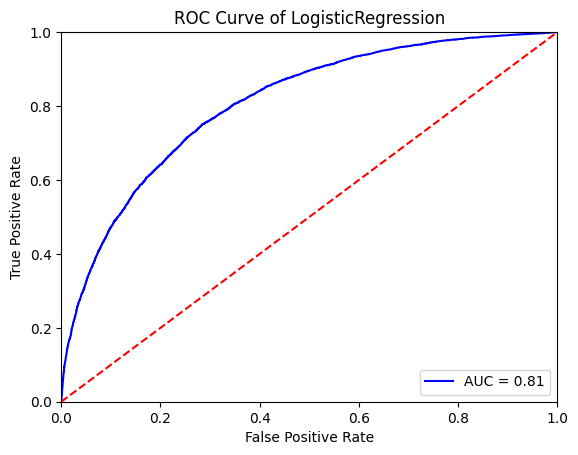

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % LOGR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LogisticRegression')
plt.show()